In [1]:
import numpy as np
import qsim
%matplotlib nbagg
from functools import partial
import matplotlib.pyplot as plt
from qsim.mps import *
from qsim.plotting import plot_projections
from qsim.exact.state_vectors import normalise_state_vector
from qsim.exact.unitaries import create_heisenberg_u
from qsim.exact.hamiltonians import create_heisenberg_h
from qsim.exact.methods import time_evolution as exact_time_evolution

### Make state vectors

In [2]:
num_of_qubits = 4
size_of_space = 2**num_of_qubits
state_vector_a = np.zeros(size_of_space, dtype=complex)
state_vector_b = np.zeros(size_of_space, dtype=complex)
state_vector_a[0] = 1
state_vector_b[4] = 1
state_vector_b[3] = 1
state_vector_b[-1] = 1
state_vector_a = normalise_state_vector(state_vector_a)
state_vector_b = normalise_state_vector(state_vector_b)
print('state a is ' + state_vectors_one_to_many(state_vector_a, as_str=True))
print('state b is ' + state_vectors_one_to_many(state_vector_b, as_str=True))

state a is 1.0+0.0j |0000>
state b is 0.6+0.0j |0011>+ 0.6+0.0j |0100>+ 0.6+0.0j |1111>


### Decompose into computational basis

In [3]:
state_vectors_one_to_many(state_vector_a)

array([[[-1.+0.j,  0.+0.j],
        [-1.+0.j,  0.+0.j],
        [-1.+0.j,  0.+0.j],
        [-1.+0.j,  0.+0.j]]])

### Create mps state from state vector or random and normalise

In [4]:
mps_a = create_specific_mps(state_vector_a)
a = normalise_mps(mps_a, direction='L')
mps_b = create_specific_mps(state_vector_b)
b = normalise_mps(mps_b, direction='L')
c = create_random_mps(num_of_qubits)

In [5]:
print([i.shape for i in a])
print([i.shape for i in b])
print([i.shape for i in c])

[(2, 1, 2), (2, 2, 4), (2, 4, 2), (2, 2, 1)]
[(2, 1, 2), (2, 2, 4), (2, 4, 2), (2, 2, 1)]
[(2, 1, 2), (2, 2, 4), (2, 4, 4), (2, 4, 1)]


In [6]:
print('state a is ' + state_vectors_one_to_many(evaluate_mps(a), as_str=True))
print('state b is ' + state_vectors_one_to_many(evaluate_mps(b), as_str=True))
print('state c is ' + state_vectors_one_to_many(evaluate_mps(c), as_str=True))

state a is 1.0+0.0j |0000>
state b is 0.6+0.0j |0011>+ 0.6+0.0j |0100>+ 0.6+0.0j |1111>
state c is 0.0+0.2j |0000>+ 0.0+0.3j |0001>+ 0.0+0.2j |0010>+ 0.0+0.2j |0011>+ -0.0+0.3j |0100>+ -0.0+0.3j |0101>+ 0.0+0.2j |0110>+ -0.0+0.3j |0111>+ 0.0+0.2j |1000>+ 0.0+0.3j |1001>+ 0.0+0.1j |1010>+ 0.0+0.2j |1011>+ 0.0+0.3j |1100>+ 0.0+0.4j |1101>+ 0.0+0.2j |1110>+ 0.0+0.3j |1111>


### Find overlap and state amplitutes

In [7]:
find_overlap(a, b)

0j

In [8]:
evaluate_mps(c, [0, 1, 1, 0])

(0.0088806875107107774+0.18864323909723169j)

### Compress mps

In [9]:
compressed_b = normalise_mps(b, direction='R', max_d=4)
print('state b is ' + state_vectors_one_to_many(evaluate_mps(compressed_b), as_str=True))
compressed_c = normalise_mps(c, direction='R', max_d=4)
# compressed_c = normalise_mps(compressed_c, direction='L', max_d=None)
print('state c is ' + state_vectors_one_to_many(evaluate_mps(compressed_c), as_str=True))

state b is 0.6+0.0j |0011>+ 0.6+0.0j |0100>+ 0.6+0.0j |1111>
state c is 0.0+0.2j |0000>+ 0.0+0.3j |0001>+ 0.0+0.2j |0010>+ 0.0+0.2j |0011>+ -0.0+0.3j |0100>+ -0.0+0.3j |0101>+ 0.0+0.2j |0110>+ -0.0+0.3j |0111>+ 0.0+0.2j |1000>+ 0.0+0.3j |1001>+ 0.0+0.1j |1010>+ 0.0+0.2j |1011>+ 0.0+0.3j |1100>+ 0.0+0.4j |1101>+ 0.0+0.2j |1110>+ 0.0+0.3j |1111>


In [10]:
print([i.shape for i in c])
print([i.shape for i in compressed_c])

[(2, 1, 2), (2, 2, 4), (2, 4, 4), (2, 4, 1)]
[(2, 1, 2), (2, 2, 4), (2, 4, 4), (2, 4, 1)]


In [11]:
abs(find_overlap(c, compressed_c))

1.0000000000000004

In [12]:
find_overlap(a, compressed_b)

0j

### Find Entanglement and mixed normalisation states

In [13]:
d, sing_vals = normalise_mps(c, direction='M', k=1)

In [14]:
sing_vals

array([  9.99949943e-01,   9.00723060e-03,   4.35512054e-03,
         1.16301081e-04])

In [15]:
find_entropy(c)

0.09695121042632214

### Create Hamiltonian MPOs and find expectation values

In [16]:
mpo_mag = create_magnetisation_mpo(4, 0)

In [17]:
d = do_mpo_on_mps(mpo_mag, b)

In [18]:
print('state b is ' + state_vectors_one_to_many(evaluate_mps(b), as_str=True))
print('state d is ' + state_vectors_one_to_many(evaluate_mps(d), as_str=True))

state b is 0.6+0.0j |0011>+ 0.6+0.0j |0100>+ 0.6+0.0j |1111>
state d is 0.3+0.0j |0011>+ 0.3+0.0j |0100>+ -0.3+0.0j |1111>


In [19]:
abs(find_overlap(b, d))

0.16666666666666671

In [20]:
mpo_heis = create_heisenberg_mpo(4, 2, 0.5)

In [21]:
e = do_mpo_on_mps(mpo_heis, a)
print('state a is ' + state_vectors_one_to_many(evaluate_mps(a), as_str=True))
print('state e is ' + state_vectors_one_to_many(evaluate_mps(e), as_str=True))

state a is 1.0+0.0j |0000>
state e is 2.5+0.0j |0000>


In [22]:
abs(find_overlap(a, e))

2.5

### Create Unitary MPOs and find expectation_values

In [33]:
num_of_qubits = 6
size_of_space = 2**num_of_qubits
state_vector_a = np.zeros(size_of_space, dtype=complex)
state_vector_b = np.zeros(size_of_space, dtype=complex)
state_vector_a[0] = 1
# state_vector_b[0] = 1
state_vector_b[1] = 1
state_vector_a = normalise_state_vector(state_vector_a)
state_vector_b = normalise_state_vector(state_vector_b)
print('state a is ' + state_vectors_one_to_many(state_vector_a, as_str=True))
print('state b is ' + state_vectors_one_to_many(state_vector_b, as_str=True))
mps_a = create_specific_mps(state_vector_a)
a = normalise_mps(mps_a, direction='L')
mps_b = create_specific_mps(state_vector_b)
b = normalise_mps(mps_b, direction='L')

state a is 1.0+0.0j |000000>
state b is 1.0+0.0j |000001>


<IPython.core.display.Javascript object>


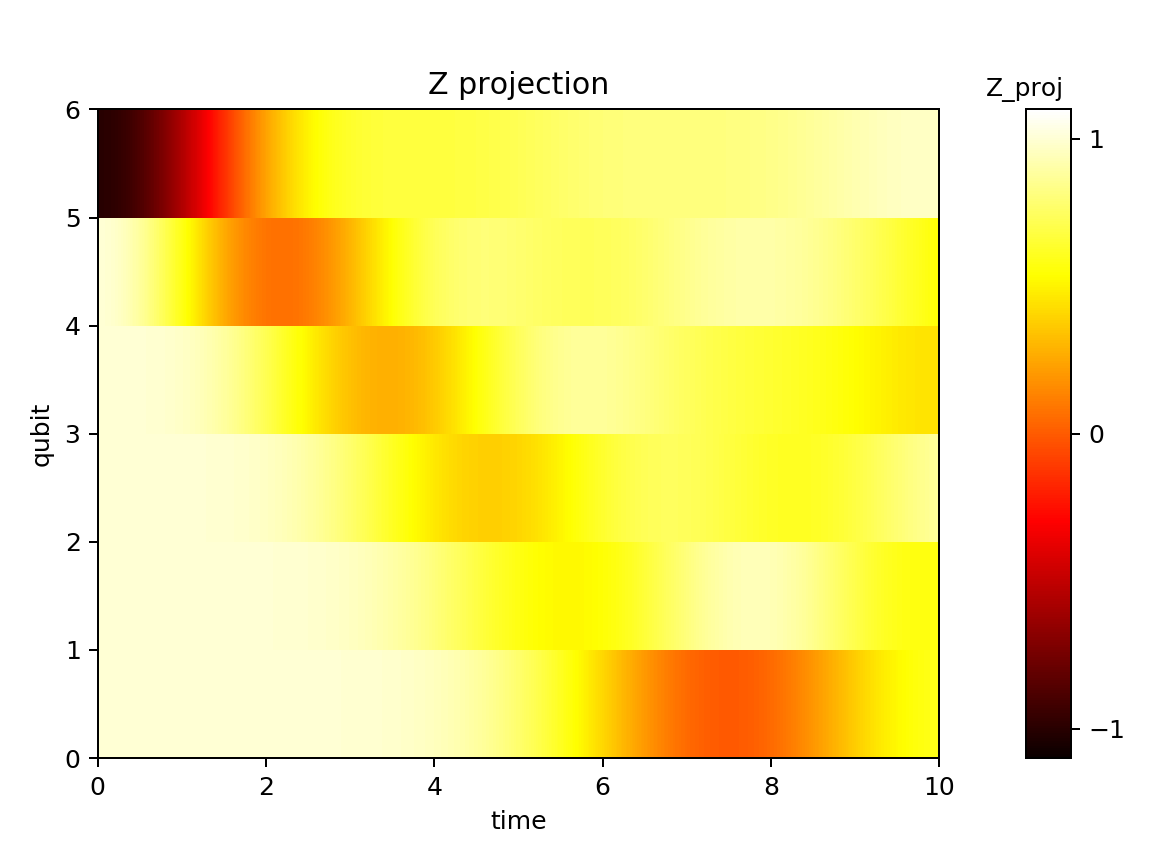

In [34]:
time, exact_x = exact_time_evolution([state_vector_b], create_heisenberg_u, 0.01, 10, J=1, h=1)
pl = plot_projections(exact_x, projection_axes=['Z'], x_axis=time)

In [35]:
mpo_list = [partial(create_heisenberg_unitary_mpo, even=True), partial(create_heisenberg_unitary_mpo, even=False)]

In [36]:
measurements=['intermediary_states', 'entanglement_entropy']

<IPython.core.display.Javascript object>


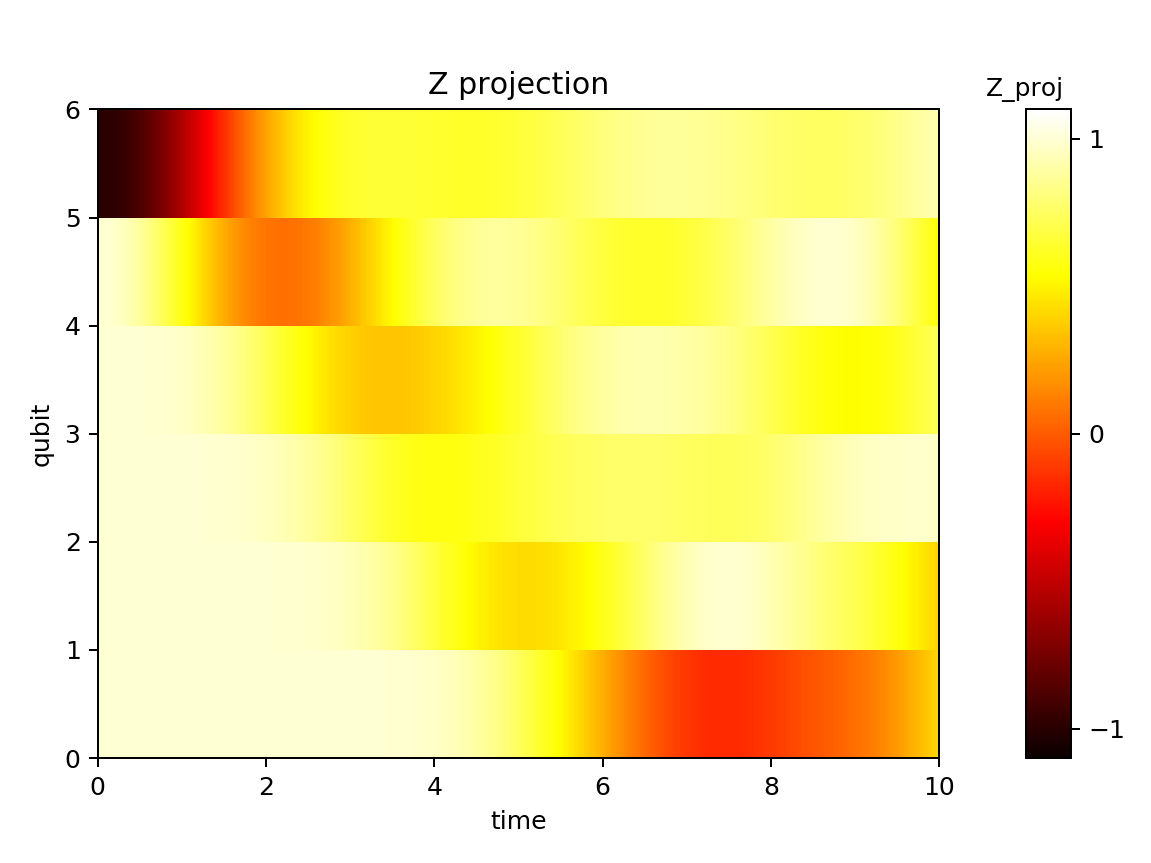

In [37]:
outputs = time_evolution(b, mpo_list, 0.01, 10, measurements=measurements, J=1, h=1, max_d=16)
evaluated_array = np.array([evaluate_mps(i) for i in outputs['intermediary_states']])
pl = plot_projections(evaluated_array, projection_axes=['Z'], x_axis=outputs['time'])

In [38]:
overlap_vals = []
for i, mps_state_v in enumerate(evaluated_array):
    val = 1 - abs(qsim.exact.methods.find_overlap(mps_state_v, exact_x[0, i]))
    overlap_vals.append(val)

<IPython.core.display.Javascript object>


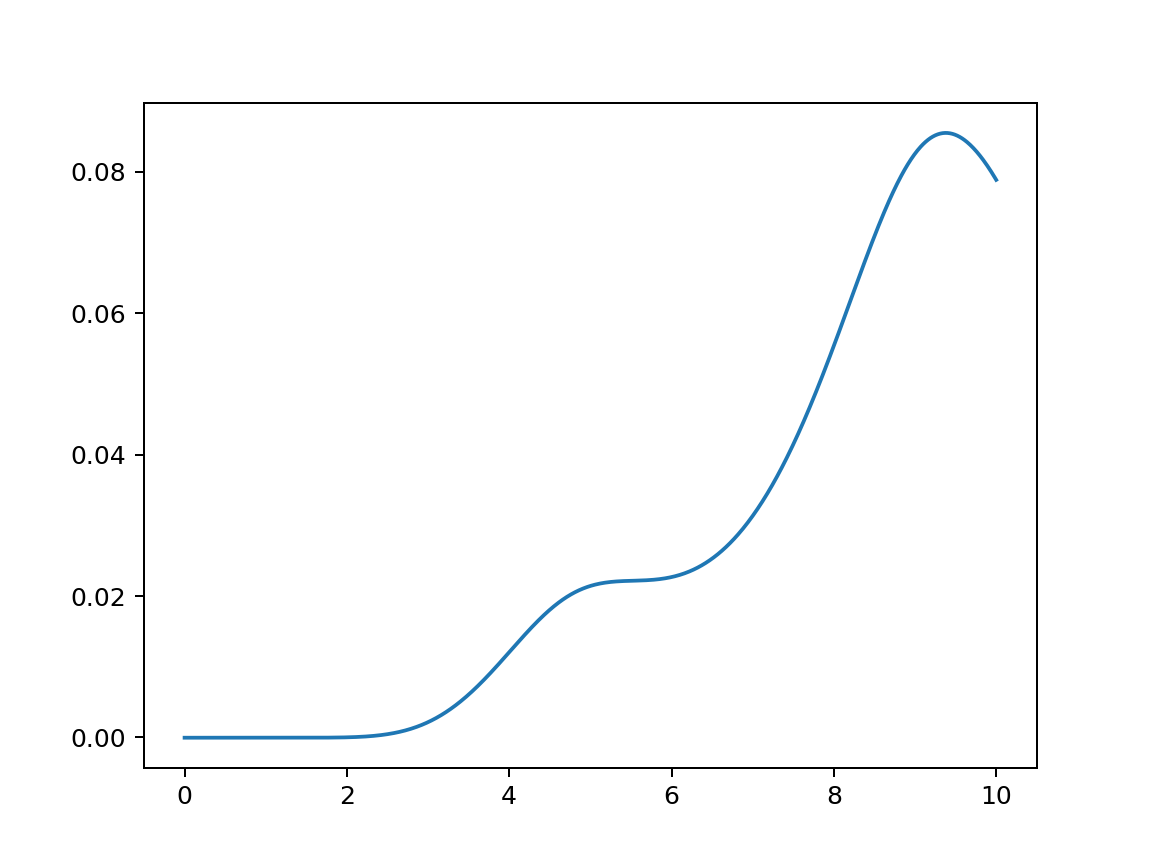

In [39]:
fig = plt.figure()
ax = plt.subplot()
ax.plot(time, overlap_vals)

<IPython.core.display.Javascript object>


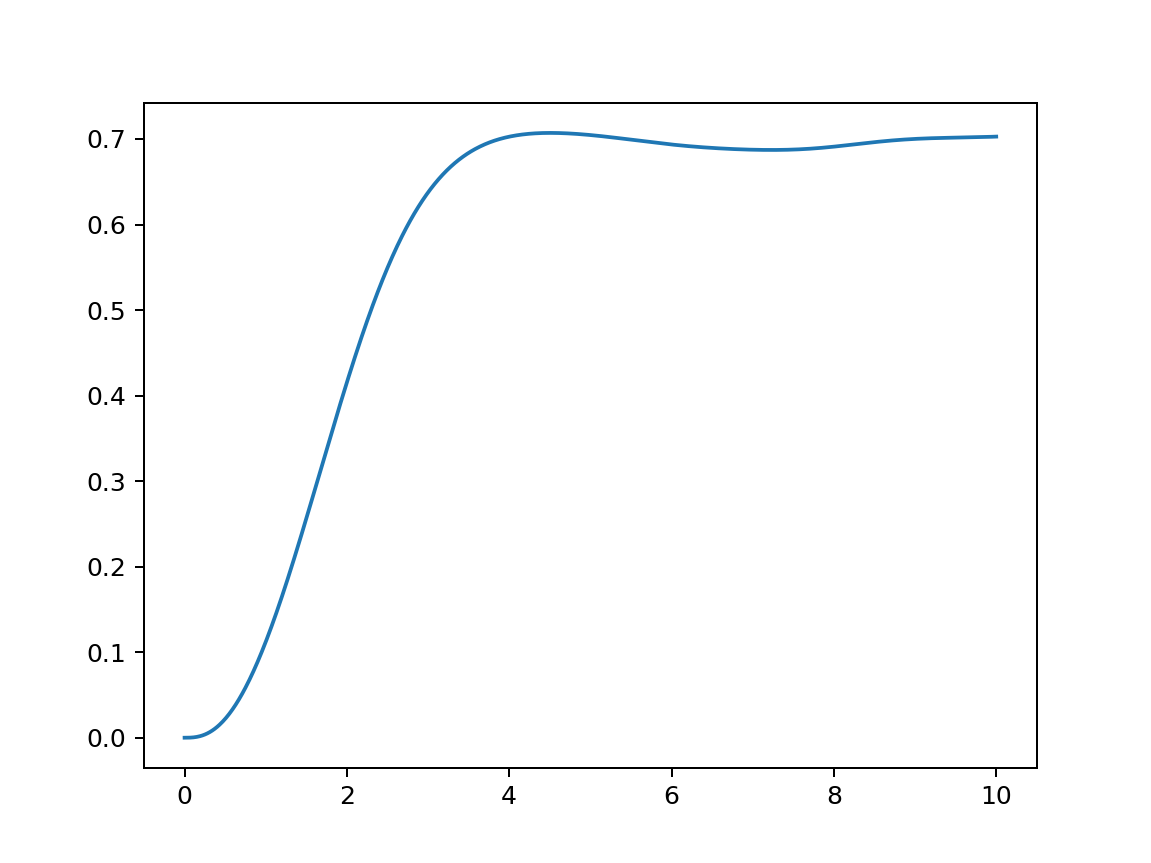

In [41]:
fig = plt.figure()
ax = plt.subplot()
ax.plot(time, outputs['entanglement_entropy'])

In [28]:
heis_even_unitary = create_heisenberg_unitary_mpo(2, 2, 1, np.pi/4, even=True)
heis_odd_unitary = create_heisenberg_unitary_mpo(2, 2, 1, np.pi/4, even=False)

In [5]:
# np.isclose(heis_even_unitary[0], mpo[0])

In [6]:
# print([i.shape for i in heis_even_unitary])
# print([i.shape for i in heis_odd_unitary])
# print([i.shape for i in mpo_heis])

In [8]:
e = do_mpo_on_mps(heis_even_unitary, a)
e1 = do_mpo_on_mps(heis_odd_unitary, e)

In [10]:
print([i.shape for i in a])
print([i.shape for i in e1])

[(2, 1, 2), (2, 2, 1)]
[(2, 1, 8), (2, 8, 1)]


In [11]:
np.linalg.norm(evaluate_mps(e))

1.0

In [15]:
e2 = normalise_mps(e1, direction='R', max_d=4)
e3 = normalise_mps(e2, direction='L')

In [16]:
print('state a is ' + state_vectors_one_to_many(evaluate_mps(a), as_str=True))
print('state e is ' + state_vectors_one_to_many(evaluate_mps(e), as_str=True))
print('state e1 is ' + state_vectors_one_to_many(evaluate_mps(e1), as_str=True))

state a is 1.0+0.0j |00>
state e is 0.6-0.8j |00>
state e1 is 0.6-0.8j |00>


In [50]:
f = do_mpo_on_mps(heis_even_unitary, b)
f1 = do_mpo_on_mps(heis_odd_unitary, f)

In [51]:
print('state b is ' + state_vectors_one_to_many(evaluate_mps(b), as_str=True))
print('state f is ' + state_vectors_one_to_many(evaluate_mps(f), as_str=True))
print('state f1 is ' + state_vectors_one_to_many(evaluate_mps(f1), as_str=True))

state b is 0.6+0.0j |0011>+ 0.6+0.0j |0100>+ 0.6+0.0j |1111>
state f is 0.4-0.4j |0011>+ 0.3-0.3j |0100>+ -0.2-0.3j |1000>+ 0.5+0.2j |1111>
state f1 is -0.1-0.3j |0010>+ 0.4-0.2j |0011>+ 0.3-0.1j |0100>+ -0.2-0.4j |0101>+ -0.4-0.1j |1000>+ 0.5+0.2j |1111>


In [52]:
evaluate_mps(f)

array([0.00 + 0.00i, 0.00 + 0.00i, 0.00 + 0.00i, 0.41 + -0.41i,
       0.27 + -0.31i, 0.00 + 0.00i, 0.00 + 0.00i, 0.00 + 0.00i,
       -0.23 + -0.34i, 0.00 + -0.00i, -0.00 + 0.00i, -0.00 + 0.00i,
       -0.00 + 0.00i, -0.00 + 0.00i, 0.00 + 0.00i, 0.53 + 0.22i])

In [33]:
abs(find_overlap(a, e))

0.94660700455334967

In [34]:
do_evolution(a, [mpo_heis_u], 5, max_d=8)

NameError: name 'mpo_heis_u' is not defined

In [33]:
np.set_printoptions(formatter={'complexfloat': lambda x: '{0.real:.2f} + {0.imag:.2f}i'.format(x)})
# np.set_printoptions(precision=0)